## PRACTICA OBLIGATORIA: **Seleccion Features**

* La práctica obligatoria de esta unidad consiste en hacer una comparativa de diferentes técnicas de selección de features sobre un dataset ya conocido. Descarga este notebook en tu ordenador y trabaja en local. 

### Descripción General y Objetivo

El objetivo de la práctica es que juegues con las diferentes técnicas de selección de features sobre un problema de clasificación. Para ello, tendrás que cargar el dataset de credit scoring que tienes en la carpeta "data" y que ya hemos trabajado anteriormente. A partir de ahí tendrás que probar diferentes técnicas de selección de features y compararlas todas entre sí y escoger finalmente el conjunto más sencillo con más potencia. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook.

In [139]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Detalles e Instrucciones

El objetivo es que construyas un modelo final de clasificación sobre la variable "SeriousDlqin2yrs" del dataset que encontrarás en "data".  

Sigue los pasos del proceso de ML que hemos aprendido para problemas supervisados con el dataset que encontrarás en "data" pero con las siguiente salvedades:

1. Deshazte de las filas con nulos, para este ejercicio no nos importan. Convierte las features NumberOf... que creas conveniente a categóricas con 2 o 3 niveles a lo sumo.

2. A la hora de hacer el miniEda aplica los siguientes análisis y selección de features: 
    1. Análisis visual combinado con filtrado por valores de correlación y umbral de covarianza.
    2. Selección de features numéricas mediante SelectKBest y ANOVA, selección de features categóricas mediante Mutual Information 
    3. Selección de las mejores features a través de un modelo intermedio (usando SelectFromModel)
    4. Selección de las mejores features empleando RFE.
    5. Selección de las mejores features empleando SFS.
    6. Selección de las mejores features mediante un sistema de hard-voting aplicado a lo obtenido en los pasos 1 a 5 anteriores.

    Para cada paso anterior (salvo el 1) se pide obtener una lista de features de "primera división" con un número de variables no superior a 6 (pueden ser menos).

3. Escoge tres modelos y a la hora compararlos para escoger el mejor, entrenalos con validación cruzada empleando las seis listas obtenidas anteriormente. Es decir tendrás 18 (6*3) medidas (emplea la métrica que creas más conveniente y si no se te ocurre ninguna el recall medio).  Escoge el mejor modelo y la mejor selección de features.

4. Optimiza los hiperparámetros del mejor modelo. Evalúalo contra test.


In [140]:
df = pd.read_csv("./data/credit_npo.csv")
display(df.sample(5).T)

,11578,840,10353,3380,11008
SeriousDlqin2yrs,0.000000,0.000000,0.000000,0.0,0.000000
RevolvingUtilizationOfUnsecuredLines,0.987367,0.062137,0.080916,0.0,0.005575
age,56.000000,59.000000,76.000000,62.0,72.000000
NumberOfTime30-59DaysPastDueNotWorse,0.000000,0.000000,0.000000,0.0,0.000000
DebtRatio,0.613832,0.435808,0.971287,0.0,0.189116
MonthlyIncome,14516.000000,12633.000000,4840.000000,4500.0,7000.000000
NumberOfOpenCreditLinesAndLoans,21.000000,22.000000,11.000000,4.0,15.000000
NumberOfTimes90DaysLate,0.000000,0.000000,0.000000,0.0,0.000000
NumberRealEstateLoansOrLines,2.000000,2.000000,4.000000,0.0,2.000000
NumberOfTime60-89DaysPastDueNotWorse,1.000000,0.000000,0.000000,0.0,0.000000


In [141]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12537 entries, 0 to 12536
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   SeriousDlqin2yrs                      12537 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  12537 non-null  float64
 2   age                                   12537 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  12537 non-null  int64  
 4   DebtRatio                             12537 non-null  float64
 5   MonthlyIncome                         11816 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       12537 non-null  int64  
 7   NumberOfTimes90DaysLate               12537 non-null  int64  
 8   NumberRealEstateLoansOrLines          12537 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  12537 non-null  int64  
 10  NumberOfDependents                    12360 non-null  float64
dtypes: float64(4), 

In [142]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SeriousDlqin2yrs,12537.0,0.068916,0.253321,0.0,0.000000,0.000000,0.000000,1.0
RevolvingUtilizationOfUnsecuredLines,12537.0,0.330359,0.368148,0.0,0.030651,0.163490,0.582219,6.0
age,12537.0,52.079445,15.077498,21.0,41.000000,51.000000,62.000000,101.0
NumberOfTime30-59DaysPastDueNotWorse,12537.0,0.409588,4.055787,0.0,0.000000,0.000000,0.000000,98.0
DebtRatio,12537.0,1.902253,9.122216,0.0,0.142268,0.302025,0.506725,99.0
MonthlyIncome,11816.0,6864.815420,11855.905437,0.0,3498.750000,5416.000000,8300.000000,702500.0
NumberOfOpenCreditLinesAndLoans,12537.0,8.482332,5.165422,0.0,5.000000,8.000000,11.000000,49.0
NumberOfTimes90DaysLate,12537.0,0.259312,4.035658,0.0,0.000000,0.000000,0.000000,98.0
NumberRealEstateLoansOrLines,12537.0,0.999202,1.134325,0.0,0.000000,1.000000,2.000000,19.0
NumberOfTime60-89DaysPastDueNotWorse,12537.0,0.228364,4.018873,0.0,0.000000,0.000000,0.000000,98.0


In [143]:
df_limpio = df.dropna()

In [144]:
print(df_limpio["NumberOfTime30-59DaysPastDueNotWorse"].value_counts())

print(df_limpio["NumberOfOpenCreditLinesAndLoans"].value_counts())

print(df_limpio["NumberOfTimes90DaysLate"].value_counts())

print(df_limpio["NumberOfTime60-89DaysPastDueNotWorse"].value_counts())


NumberOfTime30-59DaysPastDueNotWorse
0     9818
1     1354
2      397
3      127
4       64
5       23
6       20
98      10
8        2
7        1
Name: count, dtype: int64
NumberOfOpenCreditLinesAndLoans
7     1110
6     1031
8     1009
9      965
5      963
4      848
10     765
11     719
3      638
12     574
13     454
2      445
14     365
15     338
1      307
16     236
17     216
18     151
19     129
20     118
0      112
21      62
22      61
23      39
24      38
25      30
26      19
27      16
28      13
29      10
30      10
31       7
33       4
32       3
34       2
35       2
36       1
38       1
43       1
48       1
49       1
41       1
40       1
Name: count, dtype: int64
NumberOfTimes90DaysLate
0     11156
1       394
2       142
3        54
4        31
5        14
98       10
6         6
8         3
7         3
10        1
9         1
13        1
Name: count, dtype: int64
NumberOfTime60-89DaysPastDueNotWorse
0     11206
1       478
2        85
3        18
4    

NumberOfTime30-59DaysPastDueNotWorse, NumberOfTimes90DaysLate y NumberOfTime60-89DaysPastDueNotWorse son candidatos ideales para convertir a categóricas porque tienen una distribución muy sesgada: la mayoría de los valores son 0, con pocos valores altos y algunos outliers (como 98 o 11).

In [145]:
def agrupar_retrasos(x):
    if x == 0:
        return 0
    elif x == 1:
        return 1
    else:
        return 2

cols_retrasos = [
    "NumberOfTime30-59DaysPastDueNotWorse",
    "NumberOfTime60-89DaysPastDueNotWorse",
    "NumberOfTimes90DaysLate"
]

for col in cols_retrasos:
    df[col] = df[col].apply(agrupar_retrasos)


In [146]:
df_limpio['NumberOfTimes90DaysLate_cat'] = df_limpio['NumberOfTimes90DaysLate'].apply(agrupar_retrasos)
df_limpio['NumberOfTime30-59DaysPastDueNotWorse_cat'] = df_limpio['NumberOfTime30-59DaysPastDueNotWorse'].apply(agrupar_retrasos)
df_limpio['NumberOfTime60-89DaysPastDueNotWorse_cat'] = df_limpio['NumberOfTime60-89DaysPastDueNotWorse'].apply(agrupar_retrasos)

df_limpio_cat = df_limpio.drop(['NumberOfTimes90DaysLate', 'NumberOfTime30-59DaysPastDueNotWorse', 'NumberOfTime60-89DaysPastDueNotWorse'], axis = 1)

C:\Users\ChechuW10\AppData\Local\Temp\ipykernel_19896\3681169903.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_limpio['NumberOfTimes90DaysLate_cat'] = df_limpio['NumberOfTimes90DaysLate'].apply(agrupar_retrasos)
C:\Users\ChechuW10\AppData\Local\Temp\ipykernel_19896\3681169903.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_limpio['NumberOfTime30-59DaysPastDueNotWorse_cat'] = df_limpio['NumberOfTime30-59DaysPastDueNotWorse'].apply(agrupar_retrasos)
C:\Users\ChechuW10\AppData\Local\Temp\ipyker

In [147]:
df_limpio_cat.sample(5).T

,4093,3505,2509,8471,3889
SeriousDlqin2yrs,0.000000,0.000000,0.000000,0.000000,0.000000
RevolvingUtilizationOfUnsecuredLines,0.073823,0.000000,0.992857,0.225581,0.015183
age,46.000000,62.000000,61.000000,32.000000,61.000000
DebtRatio,0.409031,0.035218,0.648764,0.337527,0.175134
MonthlyIncome,4583.000000,9000.000000,4933.000000,6120.000000,3916.000000
NumberOfOpenCreditLinesAndLoans,5.000000,6.000000,7.000000,7.000000,5.000000
NumberRealEstateLoansOrLines,2.000000,0.000000,1.000000,2.000000,0.000000
NumberOfDependents,0.000000,0.000000,2.000000,0.000000,0.000000
NumberOfTimes90DaysLate_cat,0.000000,0.000000,0.000000,0.000000,0.000000
NumberOfTime30-59DaysPastDueNotWorse_cat,0.000000,0.000000,0.000000,0.000000,0.000000


In [148]:
target = "SeriousDlqin2yrs"


In [149]:
X = df_limpio_cat.drop(columns=target)
y = df_limpio_cat[target]


---

Análisis visual básico

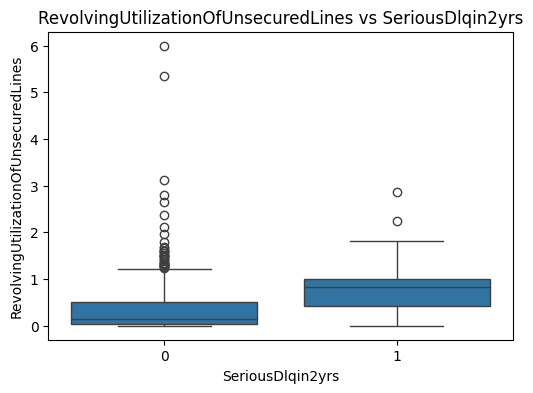

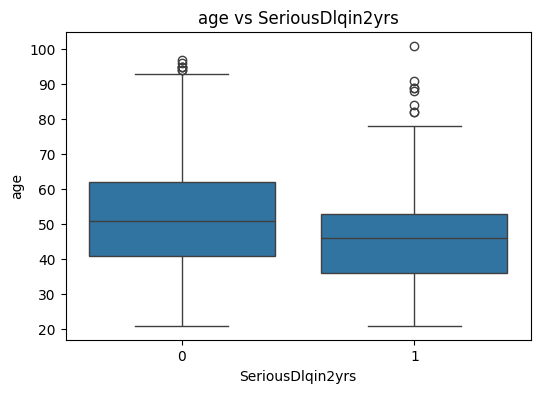

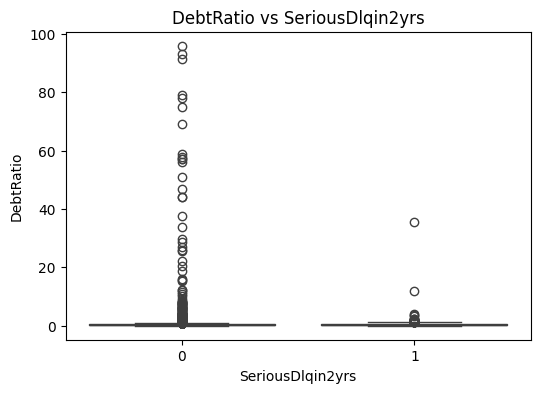

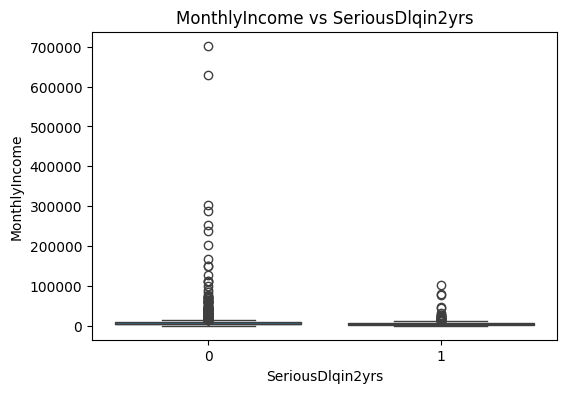

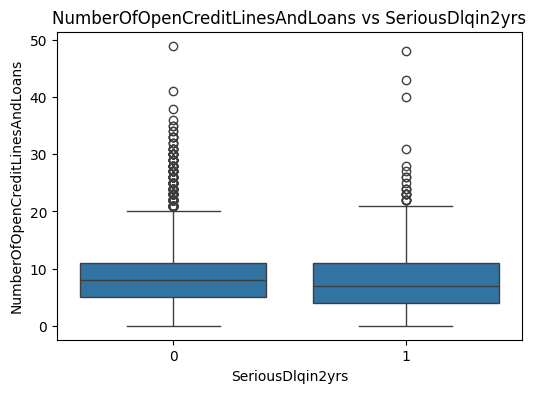

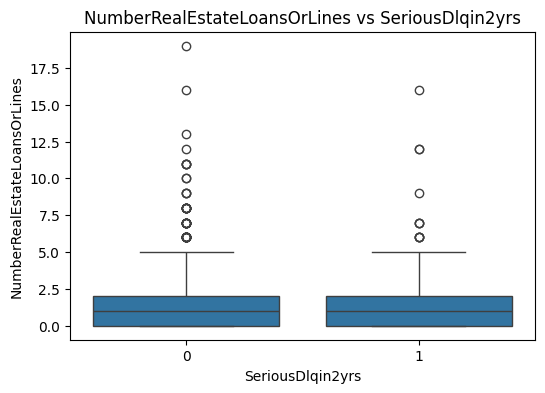

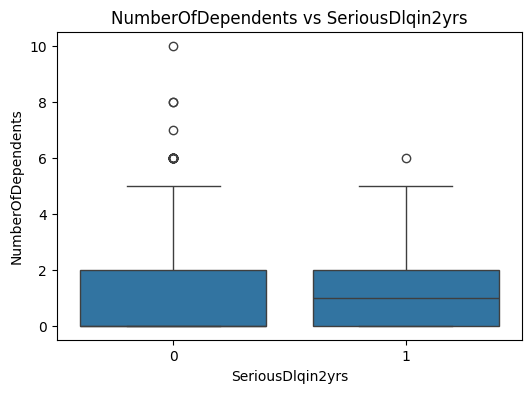

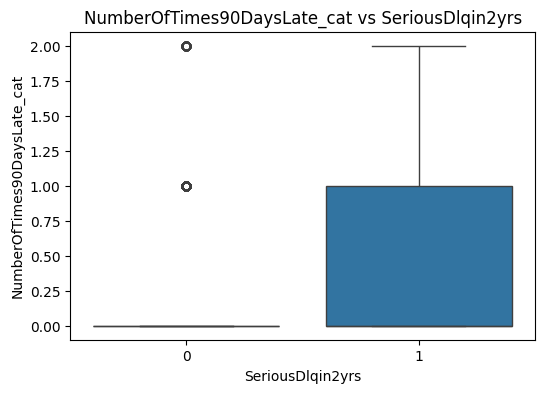

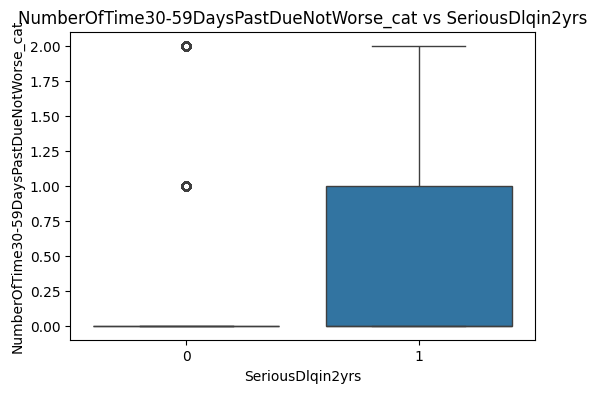

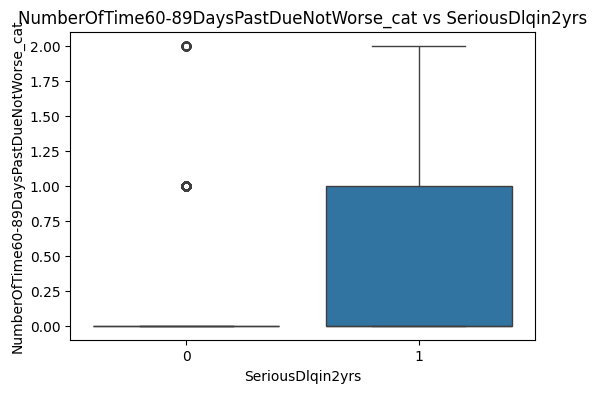

In [150]:
for col in X.columns:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=y, y=X[col])
    plt.title(f"{col} vs {target}")
    plt.show()

---

Correlación con el target

In [151]:
corr_matrix = df_limpio_cat.corr()

corr_target = corr_matrix[target].sort_values(ascending=False)
print(corr_target)


SeriousDlqin2yrs                            1.000000
NumberOfTimes90DaysLate_cat                 0.374234
RevolvingUtilizationOfUnsecuredLines        0.280350
NumberOfTime60-89DaysPastDueNotWorse_cat    0.269487
NumberOfTime30-59DaysPastDueNotWorse_cat    0.257536
NumberOfDependents                          0.043825
NumberRealEstateLoansOrLines                0.001321
DebtRatio                                  -0.001666
MonthlyIncome                              -0.022199
NumberOfOpenCreditLinesAndLoans            -0.029574
age                                        -0.106076
Name: SeriousDlqin2yrs, dtype: float64


In [163]:
umbral = 0.05
features_corr = corr_target[abs(corr_target) > umbral].index.tolist()
features_corr.remove(target)

print("Seleccionadas por correlación:")
for x in features_corr: 
    print(x)


Seleccionadas por correlación:
NumberOfTimes90DaysLate_cat
RevolvingUtilizationOfUnsecuredLines
NumberOfTime60-89DaysPastDueNotWorse_cat
NumberOfTime30-59DaysPastDueNotWorse_cat
age


In [153]:
from sklearn.feature_selection import VarianceThreshold

selector_var = VarianceThreshold(threshold=0.01)
selector_var.fit(X)

features_var = X.columns[selector_var.get_support()].tolist()

print("Seleccionadas por varianza:")
for v in features_var :
    print(v)


Seleccionadas por varianza:
RevolvingUtilizationOfUnsecuredLines
age
DebtRatio
MonthlyIncome
NumberOfOpenCreditLinesAndLoans
NumberRealEstateLoansOrLines
NumberOfDependents
NumberOfTimes90DaysLate_cat
NumberOfTime30-59DaysPastDueNotWorse_cat
NumberOfTime60-89DaysPastDueNotWorse_cat


In [154]:
features_A = list(set(features_corr).intersection(features_var))
features_A = features_A[:6]  # máximo 6

print("Lista A:")
for a in features_A :
    print(a)


Lista A:
age
NumberOfTime60-89DaysPastDueNotWorse_cat
NumberOfTime30-59DaysPastDueNotWorse_cat
RevolvingUtilizationOfUnsecuredLines
NumberOfTimes90DaysLate_cat


--- 

SelectKBest con ANOVA

In [155]:
num_cols = X.select_dtypes(include=np.number).columns.tolist()

In [156]:
num_cols

['RevolvingUtilizationOfUnsecuredLines',
 'age',
 'DebtRatio',
 'MonthlyIncome',
 'NumberOfOpenCreditLinesAndLoans',
 'NumberRealEstateLoansOrLines',
 'NumberOfDependents',
 'NumberOfTimes90DaysLate_cat',
 'NumberOfTime30-59DaysPastDueNotWorse_cat',
 'NumberOfTime60-89DaysPastDueNotWorse_cat']

In [157]:
from sklearn.feature_selection import SelectKBest, f_classif

selector_anova = SelectKBest(score_func=f_classif, k=6)
selector_anova.fit(X[num_cols], y)

scores_anova = pd.Series(
    selector_anova.scores_,
    index=num_cols
).sort_values(ascending=False)

print("Scores ANOVA:")
print(scores_anova)

features_anova = scores_anova.index[:6].tolist()


Scores ANOVA:
NumberOfTimes90DaysLate_cat                 1924.029414
RevolvingUtilizationOfUnsecuredLines        1007.740824
NumberOfTime60-89DaysPastDueNotWorse_cat     925.155530
NumberOfTime30-59DaysPastDueNotWorse_cat     839.224623
age                                          134.446536
NumberOfDependents                            22.734336
NumberOfOpenCreditLinesAndLoans               10.341763
MonthlyIncome                                  5.824786
DebtRatio                                      0.032798
NumberRealEstateLoansOrLines                   0.020601
dtype: float64


--- 

Mutual Information

In [158]:
from sklearn.feature_selection import mutual_info_classif

mi = mutual_info_classif(X[num_cols], y, random_state=42)

scores_mi = pd.Series(mi, index=num_cols).sort_values(ascending=False)

print("Scores Mutual Information:")
print(scores_mi)

features_mi = scores_mi.index[:6].tolist()


Scores Mutual Information:
RevolvingUtilizationOfUnsecuredLines        0.041554
NumberOfTimes90DaysLate_cat                 0.033090
NumberOfTime30-59DaysPastDueNotWorse_cat    0.021078
NumberOfTime60-89DaysPastDueNotWorse_cat    0.019021
NumberOfOpenCreditLinesAndLoans             0.006880
age                                         0.004542
NumberRealEstateLoansOrLines                0.003872
DebtRatio                                   0.001851
MonthlyIncome                               0.001350
NumberOfDependents                          0.000000
dtype: float64


In [159]:
ranking = (
    scores_anova.rank(ascending=False) +
    scores_mi.rank(ascending=False)
).sort_values()

features_B = ranking.index[:6].tolist()

print("Lista B:")
for b in features_B:
    print(b)


Lista B:
NumberOfTimes90DaysLate_cat
RevolvingUtilizationOfUnsecuredLines
NumberOfTime60-89DaysPastDueNotWorse_cat
NumberOfTime30-59DaysPastDueNotWorse_cat
age
NumberOfOpenCreditLinesAndLoans


--- 

SelectFromModel

In [160]:
#Escalamos datos

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [161]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

rf = RandomForestClassifier(
    n_estimators=200,
    random_state=42,
    class_weight='balanced'
)

selector_rf = SelectFromModel(rf, max_features=6)
selector_rf.fit(X, y)

features_C = X.columns[selector_rf.get_support()].tolist()

print("Lista C (RandomForest):")
for c in features_C:
    print(c)



Lista C (RandomForest):
RevolvingUtilizationOfUnsecuredLines
age
DebtRatio
MonthlyIncome


In [162]:
def listado(listado):
    for x in sorted(listado):
     print(x)

print("A:")
listado(features_A)
print("B:")
listado(features_B)
print("C:")
listado(features_C)


A:
NumberOfTime30-59DaysPastDueNotWorse_cat
NumberOfTime60-89DaysPastDueNotWorse_cat
NumberOfTimes90DaysLate_cat
RevolvingUtilizationOfUnsecuredLines
age
B:
NumberOfOpenCreditLinesAndLoans
NumberOfTime30-59DaysPastDueNotWorse_cat
NumberOfTime60-89DaysPastDueNotWorse_cat
NumberOfTimes90DaysLate_cat
RevolvingUtilizationOfUnsecuredLines
age
C:
DebtRatio
MonthlyIncome
RevolvingUtilizationOfUnsecuredLines
age


---
RFE (Recursive Feature Elimination)

In [164]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

modelo = LogisticRegression(
    class_weight="balanced",
    max_iter=500,
    random_state=42
)

rfe = RFE(
    estimator=modelo,
    n_features_to_select=6
)

rfe.fit(X_scaled, y)

features_D = X.columns[rfe.support_].tolist()

print("Lista D (RFE):")
listado(features_D)

Lista D (RFE):
NumberOfTime30-59DaysPastDueNotWorse_cat
NumberOfTime60-89DaysPastDueNotWorse_cat
NumberOfTimes90DaysLate_cat
NumberRealEstateLoansOrLines
RevolvingUtilizationOfUnsecuredLines
age


---
SFS (Sequential Feature Selection)

In [ ]:
from sklearn.feature_selection import SequentialFeatureSelector

modelo_sfs = LogisticRegression(
    class_weight="balanced",
    max_iter=500,
    random_state=42
)

sfs = SequentialFeatureSelector(
    modelo_sfs,
    n_features_to_select=6,
    direction="forward",
    scoring="recall",
    cv=5,
    n_jobs=-1
)

sfs.fit(X_scaled, y)

features_E = X.columns[sfs.get_support()].tolist()


In [166]:
print("Lista E (SFS):")
listado(features_E)

Lista E (SFS):
DebtRatio
NumberOfTime30-59DaysPastDueNotWorse_cat
NumberOfTime60-89DaysPastDueNotWorse_cat
NumberRealEstateLoansOrLines
RevolvingUtilizationOfUnsecuredLines
age


---

Hard Voting entre métodos

In [171]:
from collections import Counter

todas_listas = (
    features_A +
    features_B +
    features_C +
    features_D +
    features_E
)

conteo = Counter(todas_listas)

print("Frecuencia de aparición:")
for k, v in conteo.items():
    print(k,":",v)


Frecuencia de aparición:
age : 5
NumberOfTime60-89DaysPastDueNotWorse_cat : 4
NumberOfTime30-59DaysPastDueNotWorse_cat : 4
RevolvingUtilizationOfUnsecuredLines : 5
NumberOfTimes90DaysLate_cat : 3
NumberOfOpenCreditLinesAndLoans : 1
DebtRatio : 2
MonthlyIncome : 1
NumberRealEstateLoansOrLines : 2


In [172]:
features_F = [feature for feature, _ in conteo.most_common(6)]

print("Lista F (Hard Voting):")
listado(features_F)


Lista F (Hard Voting):
DebtRatio
NumberOfTime30-59DaysPastDueNotWorse_cat
NumberOfTime60-89DaysPastDueNotWorse_cat
NumberOfTimes90DaysLate_cat
RevolvingUtilizationOfUnsecuredLines
age


### EXTRA

Aplica la PCA como método de selección, escoge un número de componentes en función de la varianza explicada y crea un dataset con el que entrenar el mismo tipo de modelo ganador de la parte general. Entrenalo y evalúalo contra test, comenta el resultado.